In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree

In [ ]:
file_path = '/content/ds_salaries.csv'
df = pd.read_csv(file_path)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Checking for NA values in my data set

In [ ]:
missing_values = df.isna()
missing_values_count = missing_values.sum()
print("Missing values count in each column:")
print(missing_values_count)
if missing_values.any().any():
    print("There are missing values in the DataFrame.")
else:
    print("No missing values in the DataFrame.")

Missing values count in each column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
No missing values in the DataFrame.


Checking Unique values of location in my dataset

In [ ]:
locations = df['company_location'].unique()
print("Unique locations:")
print(locations)
num_locations = len(locations)
print("Number of unique locations:", num_locations)

Unique locations:
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']
Number of unique locations: 72


Looking how many companies there are in all locations of our dataset

In [ ]:
location_counts = df['company_location'].value_counts()
print("Location counts:")
print(location_counts)

Location counts:
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64


In [ ]:
salary_column = df['salary_in_usd']

salary_range = salary_column.min(), salary_column.max()
print("Salary range:", salary_range)


mean_salary = salary_column.mean()
median_salary = salary_column.median()
mode_salary = salary_column.mode().iloc[0]

print("Mean salary:", mean_salary)
print("Median salary:", median_salary)
print("Mode salary:", mode_salary)

Salary range: (5132, 450000)
Mean salary: 137570.38988015978
Median salary: 135000.0
Mode salary: 100000


50th percentile, 75th percentile, 90th percentile of salary

In [ ]:
salary_column = df['salary']

percentiles = [50, 75, 95]
salary_percentiles = np.percentile(salary_column, percentiles)

for p, value in zip(percentiles, salary_percentiles):
    print(f"{p}th percentile: {value}")

50th percentile: 138000.0
75th percentile: 180000.0
95th percentile: 260000.0


*Top* 10 jobs by the amount of ties they show up in my data set

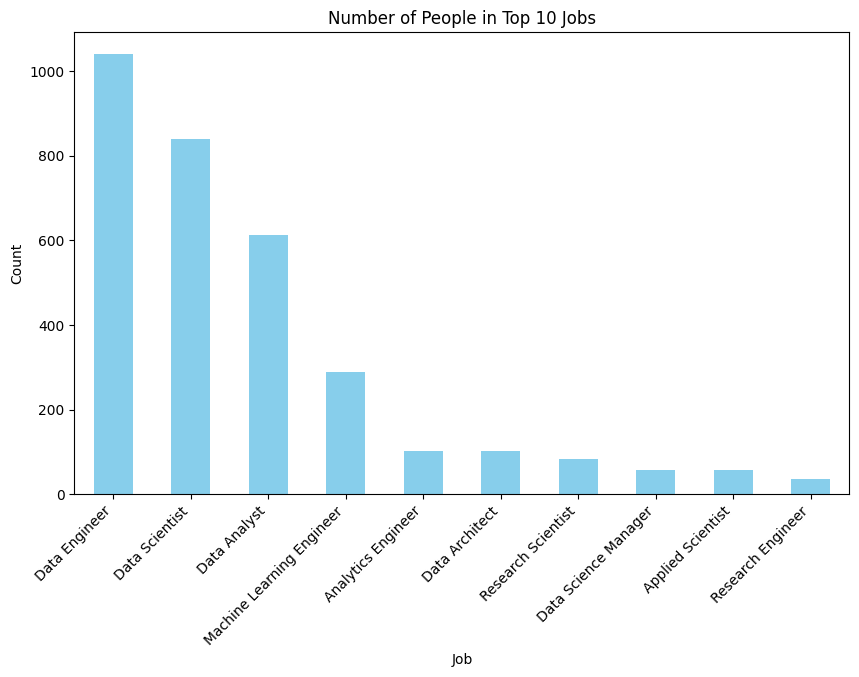

In [ ]:
job_column = df['job_title']


top_jobs = job_column.value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_jobs.plot(kind='bar', color='skyblue')
plt.title('Number of People in Top 10 Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Average Jobs in the top 10 Salries as above

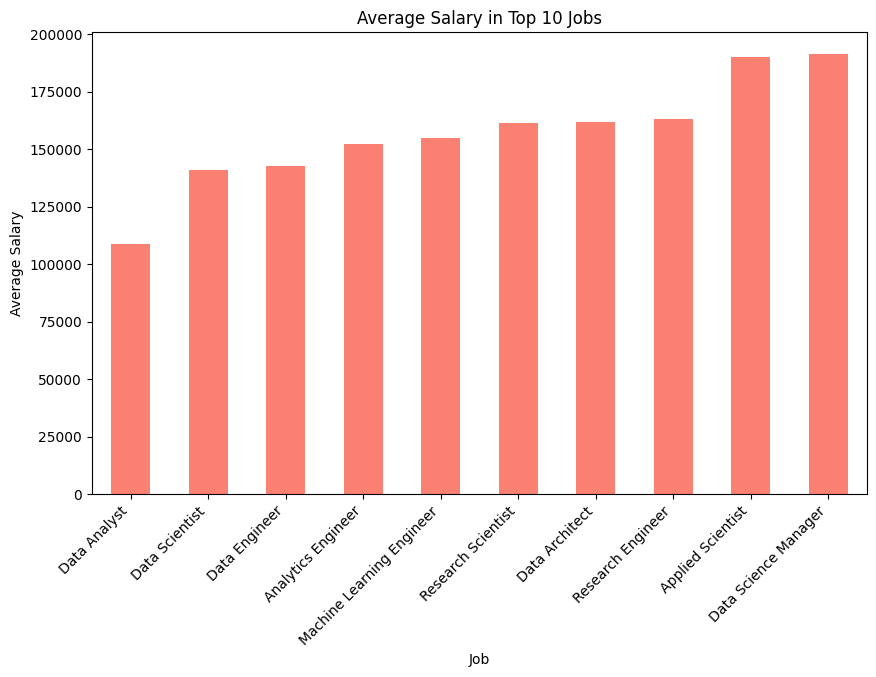

In [ ]:
job_column = df['job_title']
salary_column = df['salary_in_usd']
top_jobs = job_column.value_counts().nlargest(10).index

df_top_jobs = df[df['job_title'].isin(top_jobs)]

average_salary_by_job = df_top_jobs.groupby('job_title')['salary_in_usd'].mean()

plt.figure(figsize=(10, 6))
average_salary_by_job.sort_values().plot(kind='bar', color='salmon')
plt.title('Average Salary in Top 10 Jobs')
plt.xlabel('Job')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

Plot of the distrabution of the salary

<Axes: xlabel='salary_in_usd', ylabel='Count'>

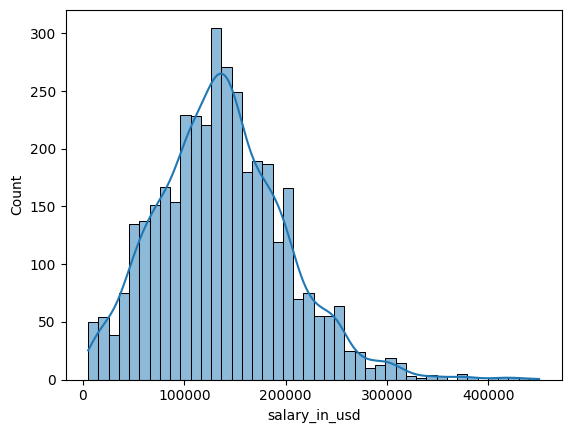

In [ ]:
sns.histplot(data=df, x ='salary_in_usd', kde = True)

Salary vs remote rate

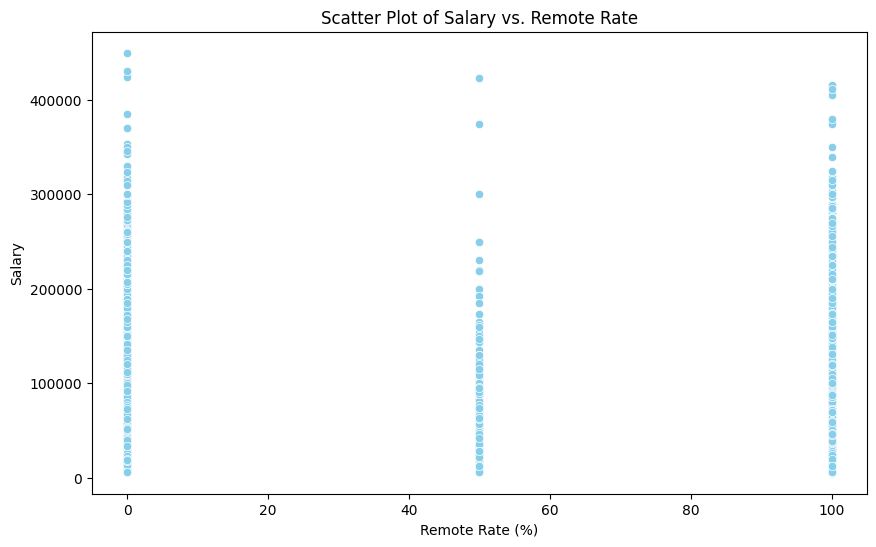

In [ ]:
salary_column = df['salary_in_usd']
remote_rate_column = df['remote_ratio']

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=df, color='skyblue')
plt.title('Scatter Plot of Salary vs. Remote Rate')
plt.xlabel('Remote Rate (%)')
plt.ylabel('Salary')
plt.show()

showing how many jobs there are based of year in the data set

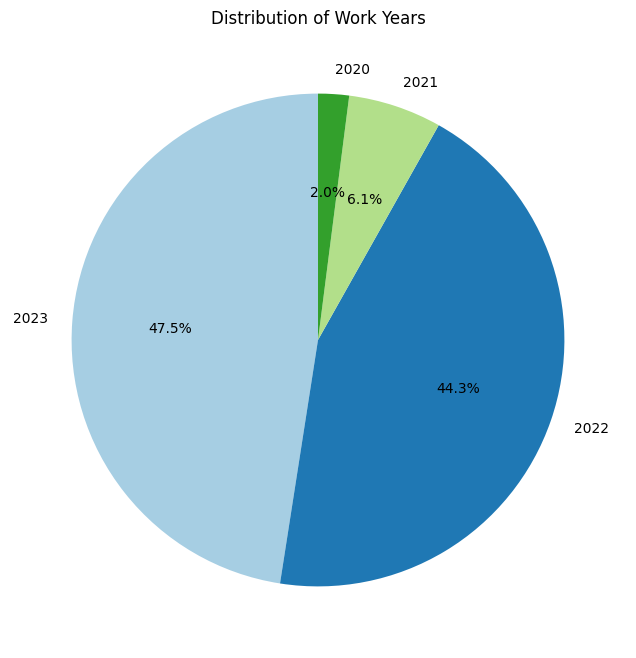

In [ ]:
work_year_column = df['work_year']


work_year_distribution = work_year_column.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(work_year_distribution, labels=work_year_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Work Years')
plt.show()

Work year and compared to the salary in each year

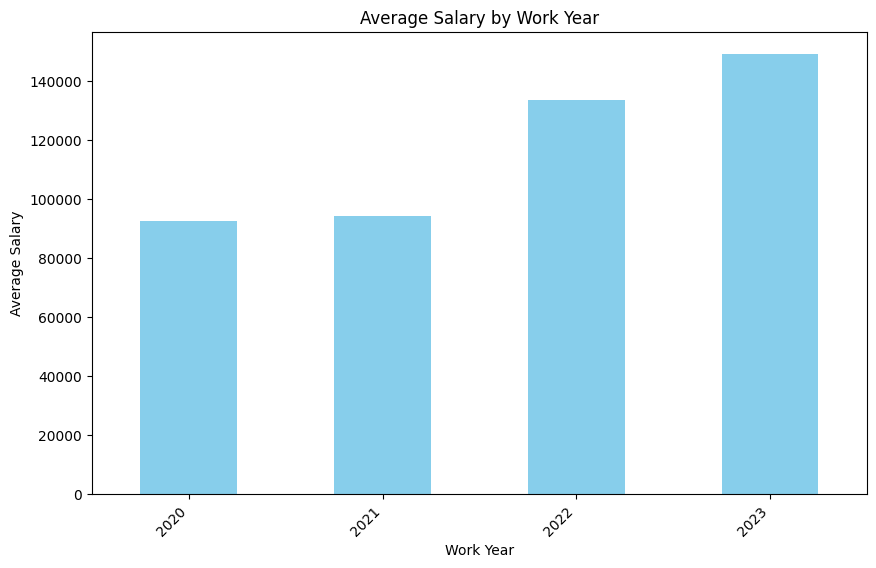

In [ ]:
work_year_column = df['work_year']
salary_column = df['salary_in_usd']

average_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

plt.figure(figsize=(10, 6))
average_salary_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

How remote ratio has been effected based on work year

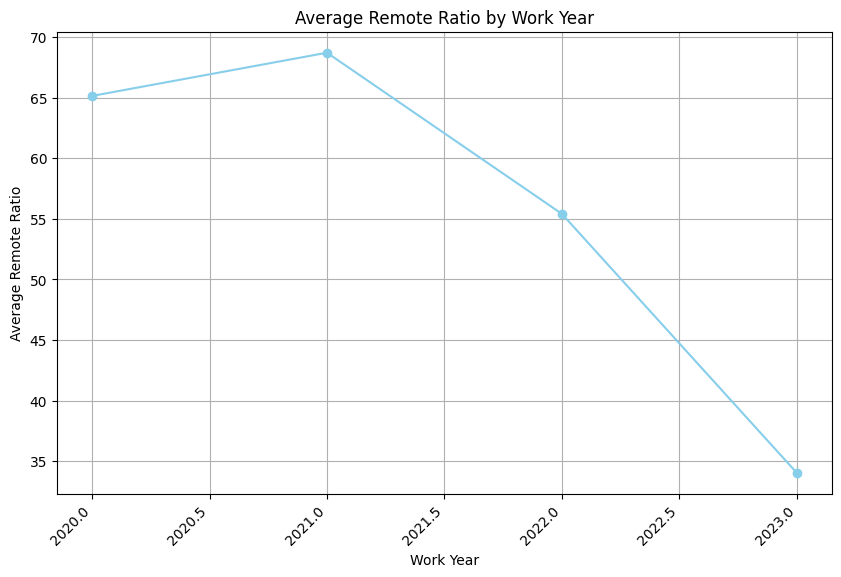

In [ ]:
work_year_column = df['work_year']
remote_ratio_column = df['remote_ratio']
average_remote_ratio_by_year = df.groupby('work_year')['remote_ratio'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_remote_ratio_by_year.index, average_remote_ratio_by_year, marker='o', linestyle='-', color='skyblue')
plt.title('Average Remote Ratio by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Average Remote Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=272e93aa6cce62a2528b97fef660e46f9e70b37bf811be19641cc1c71e819fa5
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SalariesAnalysis").getOrCreate()
df = spark.read.csv("/content/ds_salaries.csv", header=True, inferSchema=True)
df.printSchema()
df.show()
print("Number of records: {}".format(df.count()))
df.describe().show()

df.write.csv("/content/SparkDf", header=True, mode="overwrite")


root
 |-- work_year: integer (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- salary_currency: string (nullable = true)
 |-- salary_in_usd: integer (nullable = true)
 |-- employee_residence: string (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
| 

heat map of remote ratio and salaries

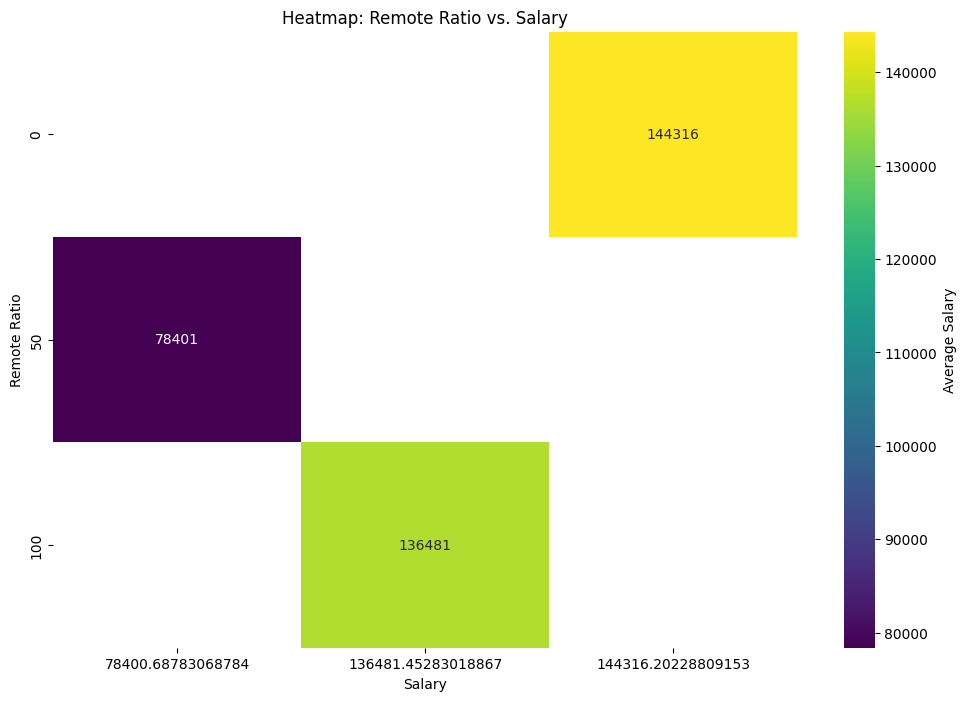

In [ ]:
heatmap_data = df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

# Reshaping the data for heatmap
heatmap_data = heatmap_data.pivot(index='remote_ratio', columns='salary_in_usd', values='salary_in_usd')

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f", cbar_kws={'label': 'Average Salary'})
plt.title('Heatmap: Remote Ratio vs. Salary')
plt.xlabel('Salary')
plt.ylabel('Remote Ratio')

plt.show()

DT MODEL BELOW


Accuracy: 0.6737683089214381
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.60      0.67       424
           1       0.60      0.77      0.67       327

    accuracy                           0.67       751
   macro avg       0.68      0.68      0.67       751
weighted avg       0.70      0.67      0.67       751

Confusion Matrix:
 [[254 170]
 [ 75 252]]


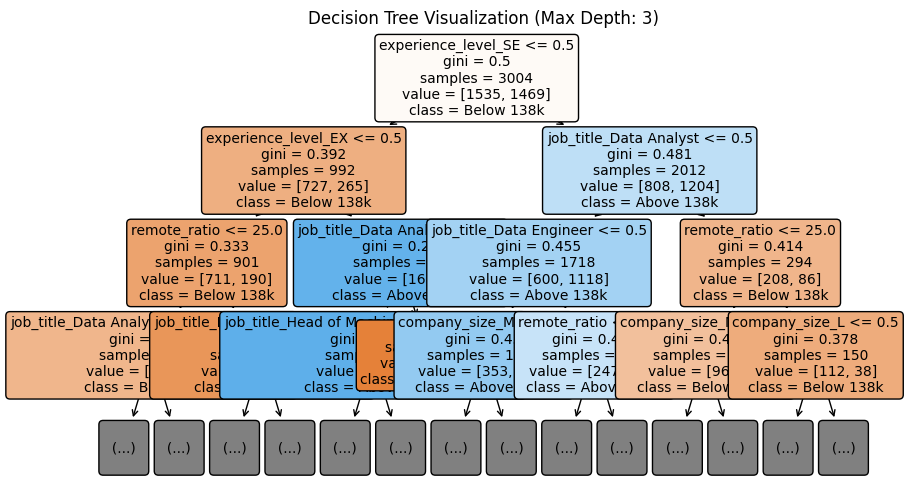

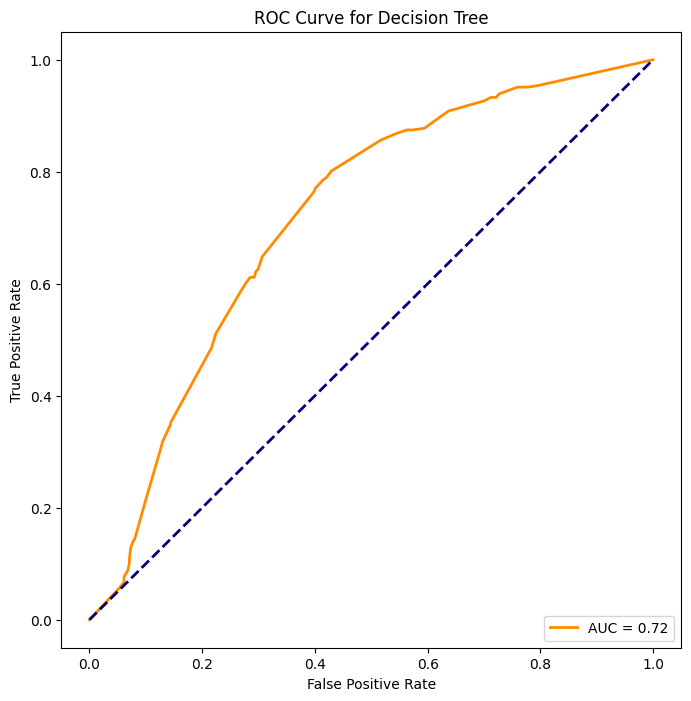

In [ ]:
X = pd.get_dummies(df[['remote_ratio', 'company_size', 'job_title', 'experience_level']], columns=['job_title', 'company_size', 'experience_level'], prefix=['job_title', 'company_size', 'experience_level'])
df['Above 138k'] = df['salary_in_usd'].apply(lambda x: 1 if x > 138000 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, df['Above 138k'], test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
max_depth = 3  # You can adjust this value based on your preference
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Below 138k', 'Above 138k'], rounded=True, fontsize=10, max_depth=max_depth)
plt.title(f'Decision Tree Visualization (Max Depth: {max_depth})')
plt.show()
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Logestic Regression Hypertuning

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
model = LogisticRegression()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Best Parameters: {'C': 0.01}
Accuracy: 0.68
Confusion Matrix:
[[260 164]
 [ 80 247]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       424
           1       0.60      0.76      0.67       327

    accuracy                           0.68       751
   macro avg       0.68      0.68      0.68       751
weighted avg       0.69      0.68      0.68       751



Logistic Regression Model

In [ ]:
best_model = LogisticRegression(C=0.1)

# Fit the model to the training data
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.67
Confusion Matrix:
[[259 165]
 [ 80 247]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       424
           1       0.60      0.76      0.67       327

    accuracy                           0.67       751
   macro avg       0.68      0.68      0.67       751
weighted avg       0.69      0.67      0.67       751



Confusion Matrix for Log Reg

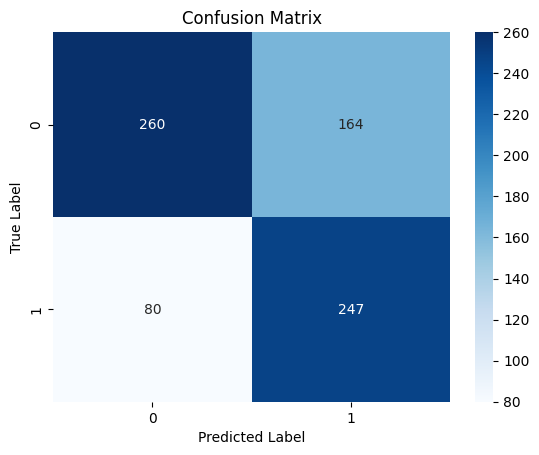

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

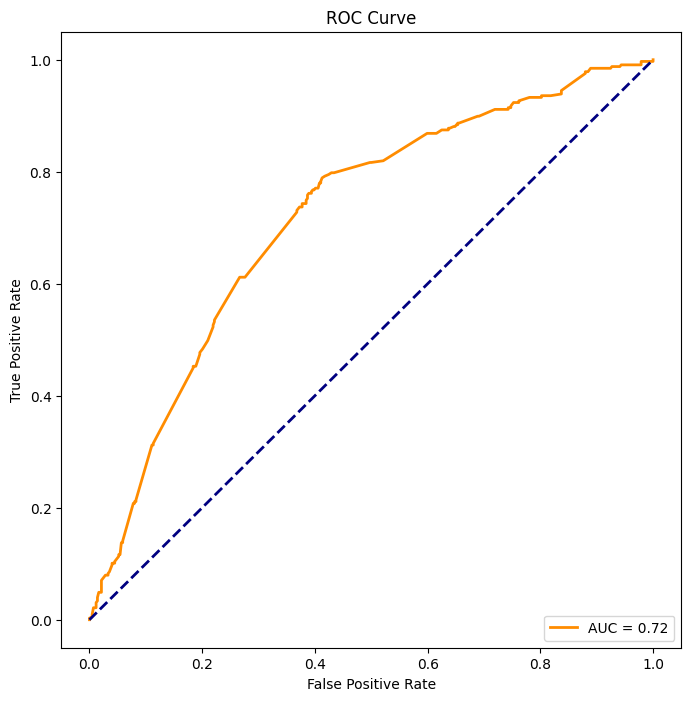

In [ ]:
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

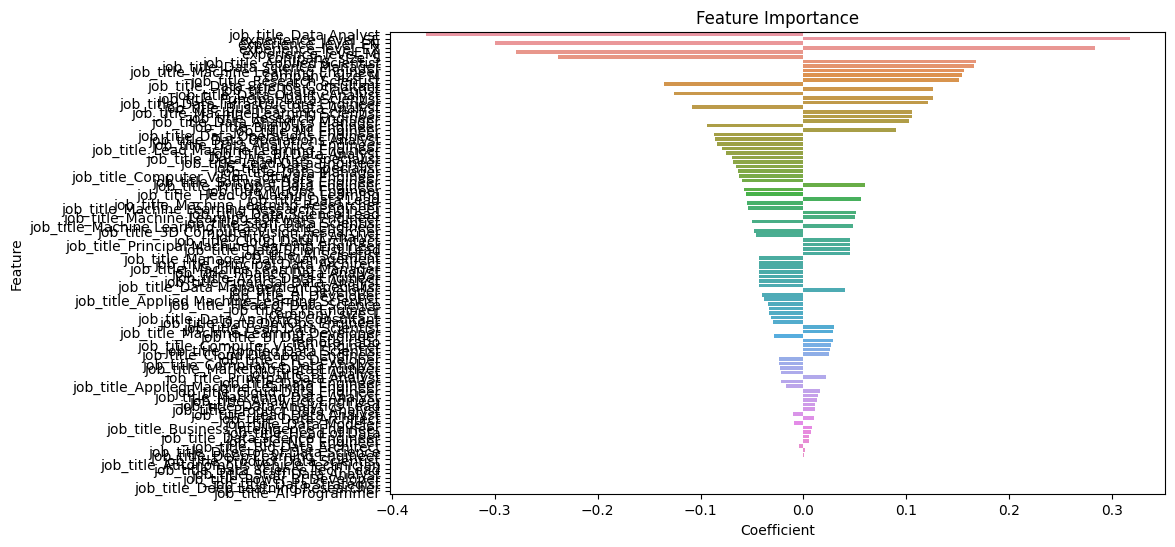

In [ ]:
feature_names = X.columns
coefficients = best_model.coef_[0]

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['AbsoluteCoefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='AbsoluteCoefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = pd.get_dummies(df[['remote_ratio', 'company_size', 'job_title', 'experience_level']], columns=['job_title', 'company_size', 'experience_level'], prefix=['job_title', 'company_size', 'experience_level'])
df['Above 138k'] = df['salary_in_usd'].apply(lambda x: 1 if x > 138000 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, df['Above 138k'], test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print(f'Best Parameters: {best_params_rf}')
y_pred_rf = best_model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf:.2f}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{classification_rep_rf}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.68
Confusion Matrix:
[[255 169]
 [ 75 252]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.60      0.68       424
           1       0.60      0.77      0.67       327

    accuracy                           0.68       751
   macro avg       0.69      0.69      0.68       751
weighted avg       0.70      0.68      0.68       751



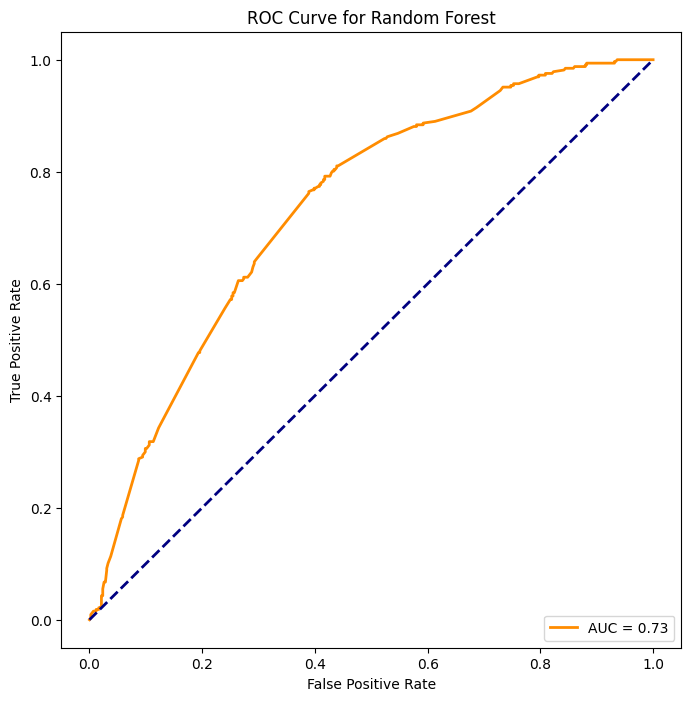

In [ ]:
y_probs_rf = best_model_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Remote_Ratio': df.loc[y_test.index, 'remote_ratio']})
tp_df = result_df[(result_df['Actual'] == 1) & (result_df['Predicted'] == 1)]
tn_df = result_df[(result_df['Actual'] == 0) & (result_df['Predicted'] == 0)]
print("Remote Ratio Distribution for True Positives:")
print(tp_df['Remote_Ratio'].value_counts())

print("\nRemote Ratio Distribution for True Negatives:")
print(tn_df['Remote_Ratio'].value_counts())

Remote Ratio Distribution for True Positives:
0      151
100     95
50       1
Name: Remote_Ratio, dtype: int64

Remote Ratio Distribution for True Negatives:
100    126
0      111
50      23
Name: Remote_Ratio, dtype: int64


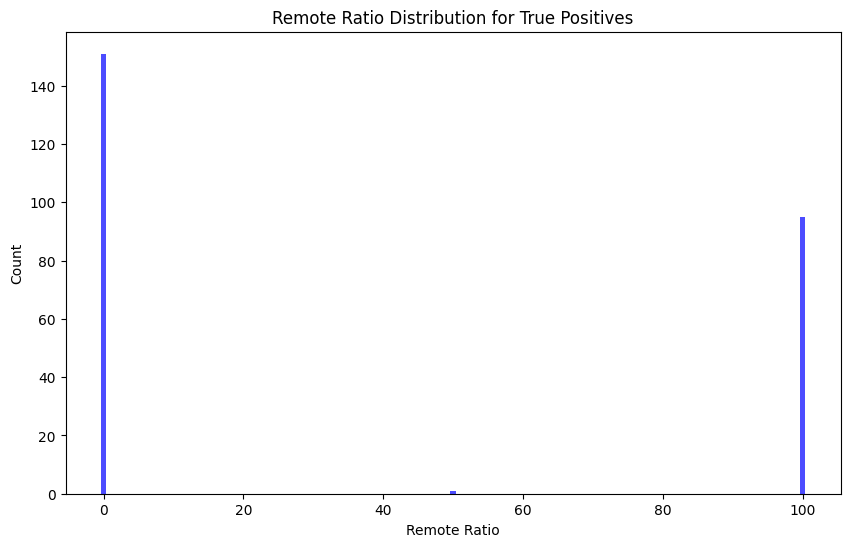

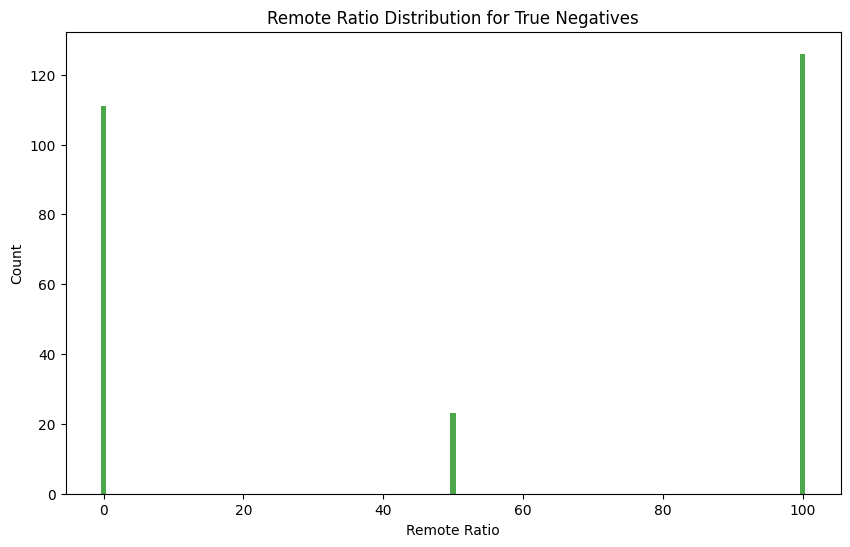

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(tp_df['Remote_Ratio'].value_counts().index, tp_df['Remote_Ratio'].value_counts(), color='blue', alpha=0.7)
plt.title('Remote Ratio Distribution for True Positives')
plt.xlabel('Remote Ratio')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(tn_df['Remote_Ratio'].value_counts().index, tn_df['Remote_Ratio'].value_counts(), color='green', alpha=0.7)
plt.title('Remote Ratio Distribution for True Negatives')
plt.xlabel('Remote Ratio')
plt.ylabel('Count')
plt.show()

In [ ]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
print("Length of df['remote_ratio']:", len(df['remote_ratio']))

# Check if indices match
print("Indices of y_test:", y_test.index)
print("Indices of y_pred:", pd.Index(range(len(y_pred))))
print("Indices of df['remote_ratio']:", df['remote_ratio'].index)

Length of y_test: 751
Length of y_pred: 751
Length of df['remote_ratio']: 3755
Indices of y_test: Int64Index([2148, 1044, 3321,  439, 3519, 1849,   93, 1281, 3581, 1272,
            ...
            3523,  543, 1284, 1533, 1446, 2403, 2897,  612, 2677, 2014],
           dtype='int64', length=751)
Indices of y_pred: RangeIndex(start=0, stop=751, step=1)
Indices of df['remote_ratio']: RangeIndex(start=0, stop=3755, step=1)
